<a href="https://colab.research.google.com/github/datavers/portfolio_idea/blob/dataloading/Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cloning the git repository - Initial steps in Colabs

In [5]:
! git clone https://github.com/datavers/portfolio_idea.git

Cloning into 'portfolio_idea'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 22 (delta 4), reused 12 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 1.12 MiB | 4.25 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [6]:
! git branch -r

  origin/HEAD -> origin/main
  origin/dataloading
  origin/main


In [7]:
! git switch dataloading

Branch 'dataloading' set up to track remote branch 'dataloading' from 'origin'.
Switched to a new branch 'dataloading'


In [8]:
! git pull

Already up to date.


In [1]:
import os

In [ ]:
! pip install --upgrade pip --q

In [ ]:
! pip install pandas --q
! pip install seaborn --q
! pip install matplotlib --q
! pip install yfinance --q


In [ ]:
! pip install scikit-learn --q

In [2]:
print("Jelenlegi munkakönyvtár:", os.getcwd())

Jelenlegi munkakönyvtár: /content


In [4]:
os.chdir('/content/portfolio_idea/')

In [ ]:
!git push

fatal: could not read Username for 'https://github.com': No such device or address


In [9]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import seaborn as sns # type: ignore

import matplotlib.pyplot as plt # type: ignore

In [10]:
import yfinance as yf # type: ignore

## Import the sector ETFs and other instrumentums

A szektor ETF-ek betöltése

In [11]:
sector_data = yf.download('XLE XLB XLI XLU XLV XLF XLY XLP VGT VOX VNQ', start='2020-01-01', group_by='ticker')

[*********************100%%**********************]  11 of 11 completed


In [11]:
sector_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1167 entries, 2020-01-02 to 2024-08-21
Data columns (total 66 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (XLE, Open)       1167 non-null   float64
 1   (XLE, High)       1167 non-null   float64
 2   (XLE, Low)        1167 non-null   float64
 3   (XLE, Close)      1167 non-null   float64
 4   (XLE, Adj Close)  1167 non-null   float64
 5   (XLE, Volume)     1167 non-null   int64  
 6   (XLY, Open)       1167 non-null   float64
 7   (XLY, High)       1167 non-null   float64
 8   (XLY, Low)        1167 non-null   float64
 9   (XLY, Close)      1167 non-null   float64
 10  (XLY, Adj Close)  1167 non-null   float64
 11  (XLY, Volume)     1167 non-null   int64  
 12  (VGT, Open)       1167 non-null   float64
 13  (VGT, High)       1167 non-null   float64
 14  (VGT, Low)        1167 non-null   float64
 15  (VGT, Close)      1167 non-null   float64
 16  (VGT, Adj Close)  1167 n

Multi-index DF, ezért kiválasztom csak a záró értékeket

In [12]:
# Kiválasztom az összes 'Close' oszlopot
close_prices = sector_data.xs('Close', level=1, axis=1)

# Az oszlopok átnevezése a ticker nevére
close_prices.columns = close_prices.columns.get_level_values(0)

# Eredmény megjelenítése
print(close_prices)

Ticker            XLU         XLI         VOX        VNQ        XLB  \
Date                                                                  
2020-01-02  63.810001   83.010002   95.019997  91.699997  60.700001   
2020-01-03  63.939999   82.849998   94.639999  92.269997  59.720001   
2020-01-06  64.000000   82.879997   95.760002  92.379997  59.459999   
2020-01-07  63.910000   82.709999   95.820000  91.349998  59.389999   
2020-01-08  63.880001   82.989998   96.309998  91.629997  59.599998   
...               ...         ...         ...        ...        ...   
2024-08-16  74.440002  126.970001  137.520004  91.330002  90.570000   
2024-08-19  74.930000  127.739998  139.259995  92.089996  91.000000   
2024-08-20  74.769997  127.389999  139.199997  91.980003  90.669998   
2024-08-21  75.300003  128.160004  139.820007  92.470001  91.709999   
2024-08-22  75.315002  127.942497  139.070007  92.502602  91.364998   

Ticker            XLE         XLV        XLF        XLP         VGT  \
Date 

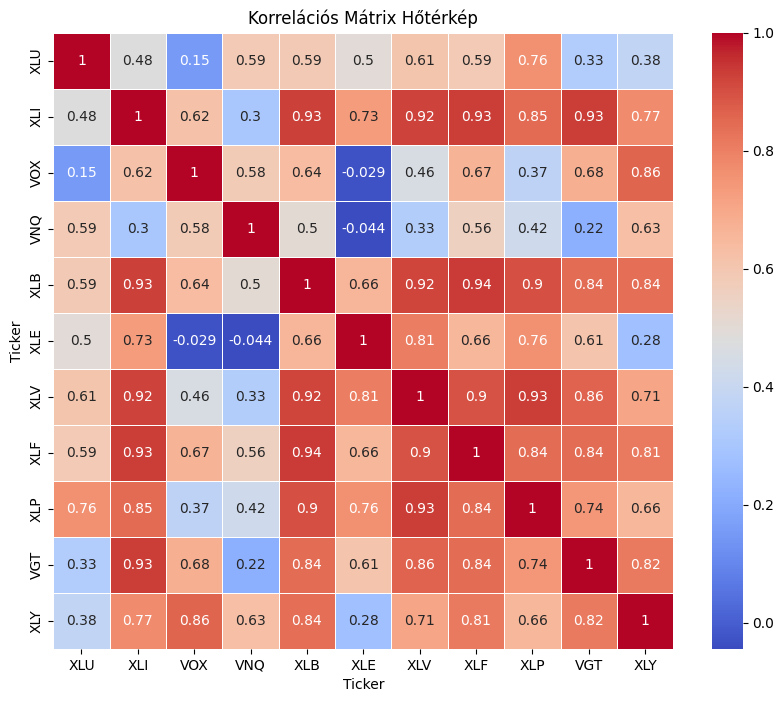

In [13]:
# Létrehozom a hőtérképet
corr_matrix = close_prices.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korrelációs Mátrix Hőtérkép')
plt.show()

Referencia index betöltése

In [14]:
sp500 = yf.Ticker('SPY')
sp500_hist = sp500.history(start='2020-01-01')
sp500_hist = sp500_hist['Close']

## Correlation analysis

Kiválasztom azokat a termék kombinációkat, amelyek közt a legkisebb a korreláció

In [15]:
from itertools import combinations

# Határérték az erős korrelációra
threshold = 0.6

# Oszlopnevek lekérése
columns = corr_matrix.columns

# Lehetséges négyes kombinációk létrehozása
combs = combinations(columns, 4)

# Négyes kombinációk szűrése a korrelációs értékek alapján
selected_combinations = []
for comb in combs:
    if all(corr_matrix.loc[comb[i], comb[j]] < threshold for i in range(4) for j in range(i+1, 4)):
        selected_combinations.append(comb)

# Megjelenítjük azokat a négyes kombinációkat, amelyek megfelelnek a feltételnek
print("Négyes kombinációk, amelyek korrelációi 0.5 alatt vannak:")
print(selected_combinations[0])

Négyes kombinációk, amelyek korrelációi 0.5 alatt vannak:
('XLU', 'VOX', 'VNQ', 'XLE')


Kíváncsiságból ábrázoltam a kiválasztott négy eszközt, hogy vizuálisan látható-e köztük egyfajta kiegyensúlyozottság

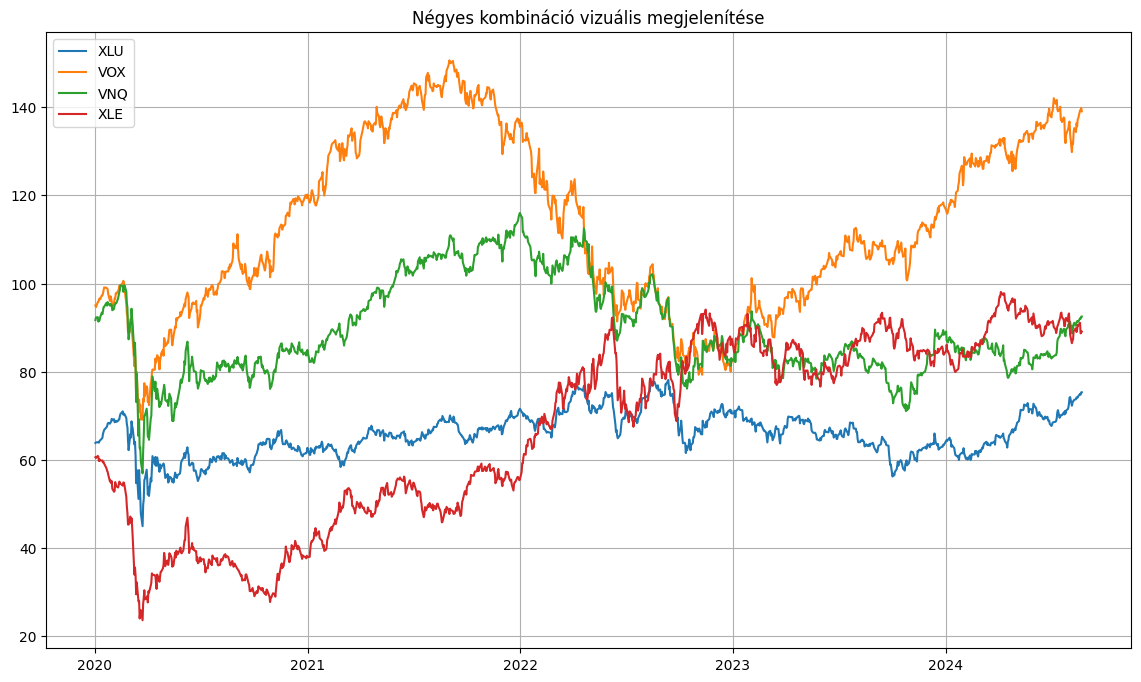

In [16]:
portfolio = close_prices[list(selected_combinations[0])]
plt.figure(figsize=(14, 8))
for ticker in portfolio.columns:
    plt.plot(portfolio.index, portfolio[ticker], label=f'{ticker}')

plt.legend()
plt.grid(True)
plt.title("Négyes kombináció vizuális megjelenítése")
plt.show()

Külön is megjelenítem a négy terméket, hogy látható legyen az egymás közti korreláció. A célom az volt, hogy egyik esetben sem legyen a korreláció nagyobb mint 0.6

<Axes: xlabel='Ticker', ylabel='Ticker'>

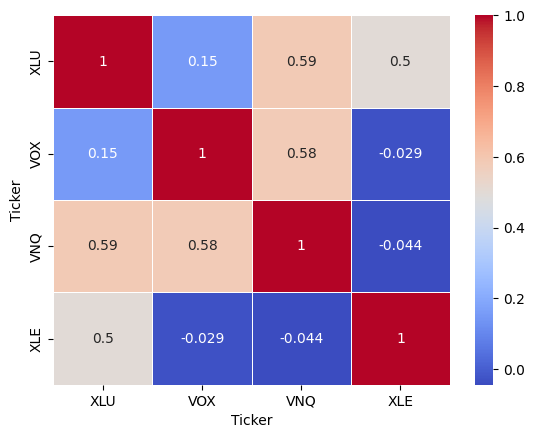

In [17]:
sns.heatmap(portfolio.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

## Két további termék betöltése más típusú eszközosztályokból, a "nyertes" szektor ETF-ek részvények kiválasztása

In [18]:
# Részvények kiválasztása a fenti ETF-ekből
stocks = 'XOM GOOG PLD DUK'
others = 'GBTC IAU'

# Árfolyamok betöltése majd záró értékek kiválasztása
stocks_data = yf.download(stocks, start='2020-01-01', group_by='ticker')
others_data = yf.download(others, start='2020-01-01', group_by='ticker')

[*********************100%%**********************]  4 of 4 completed
[*********************100%%**********************]  2 of 2 completed


In [19]:
stocks_close = stocks_data.xs("Close", level=1, axis=1)
stocks_close.columns = stocks_close.columns.get_level_values(0)

others_close = others_data.xs("Close", level=1, axis=1)
others_close.columns = others_close.columns.get_level_values(0)

Új DF kialakítása a két korábbi DF-ből

In [171]:
mixed_portfolio = pd.merge(stocks_close, others_close, left_index=True, right_index=True)

Az új DF korrelációjának vizuális megjelenítése

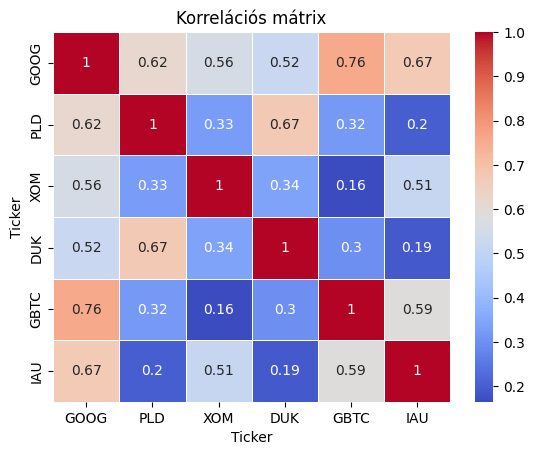

In [21]:
portfolio_matrix = mixed_portfolio.corr()
sns.heatmap(mixed_portfolio.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Korrelációs mátrix")
plt.show()

Szemre van olyan kombinációm, amely esetén a 0.6-os küszöbérték fölött van a korreláció, így ezt a DF-et tovább kell szűrnöm

In [22]:
# Van-e 4 olyan termék, amely kevésbé korrelál együtt?

# Határérték az erős korrelációra
threshold = 0.6

# Oszlopnevek lekérése
columns = portfolio_matrix.columns

# Lehetséges négyes kombinációk létrehozása
combs = combinations(columns, 4)

# Négyes kombinációk szűrése a korrelációs értékek alapján
selected_combinations = []
for comb in combs:
    if all(portfolio_matrix.loc[comb[i], comb[j]] < threshold for i in range(4) for j in range(i+1, 4)):
        selected_combinations.append(comb)

# Megjelenítjük azokat a négyes kombinációkat, amelyek megfelelnek a feltételnek
print("Négyes kombinációk, amelyek korrelációi 0.6 alatt vannak:")
print(selected_combinations[0])

Négyes kombinációk, amelyek korrelációi 0.6 alatt vannak:
('PLD', 'XOM', 'GBTC', 'IAU')


A fentiekből 4 olyan eszközt maradt, amelyre igaz, hogy a korreláció az általam meghatározott szint alatt van

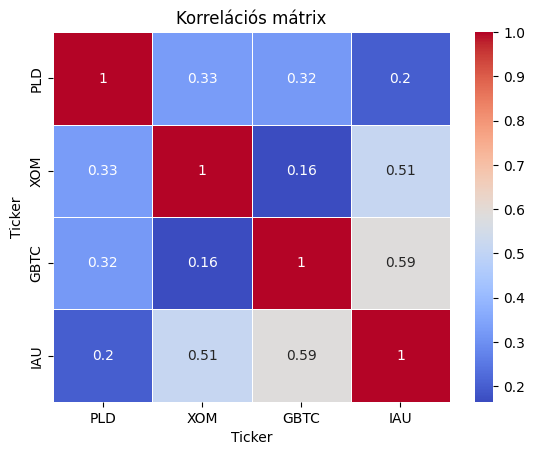

In [23]:
portfolio = mixed_portfolio[list(selected_combinations[0])]
sns.heatmap(portfolio.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Korrelációs mátrix")
plt.show()

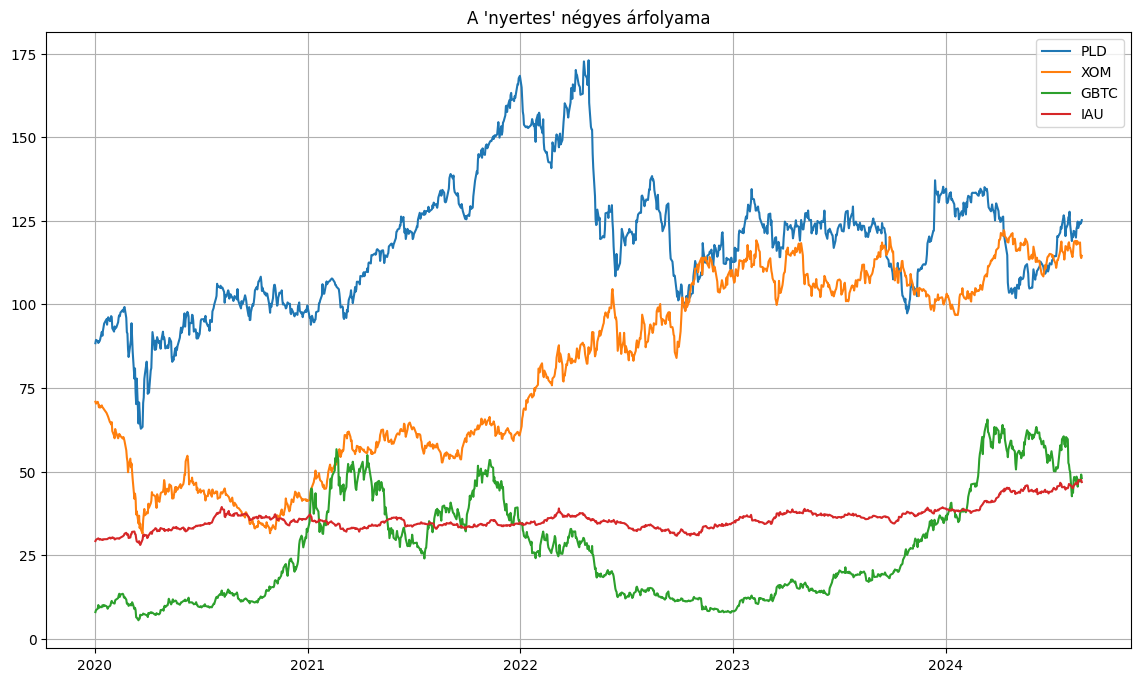

In [24]:
# A négyes kombináció árfolyamának megjelenítése vizuálisan

plt.figure(figsize=(14, 8))

for ticker in portfolio.columns:
    plt.plot(portfolio.index, portfolio[ticker], label=f'{ticker}')

plt.legend()
plt.grid(True)
plt.title("A 'nyertes' négyes árfolyama")
plt.show()

Mivel eltérő árfolyamok vannak, ezrét szeretném normalizálni is az árfolyamokat, csak azért, hogy jobban összehasonlíthatóak legyenek

In [25]:
# MinMaxScaler betöltése
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
portfolio_norm = pd.DataFrame(scaler.fit_transform(portfolio), columns=portfolio.columns)

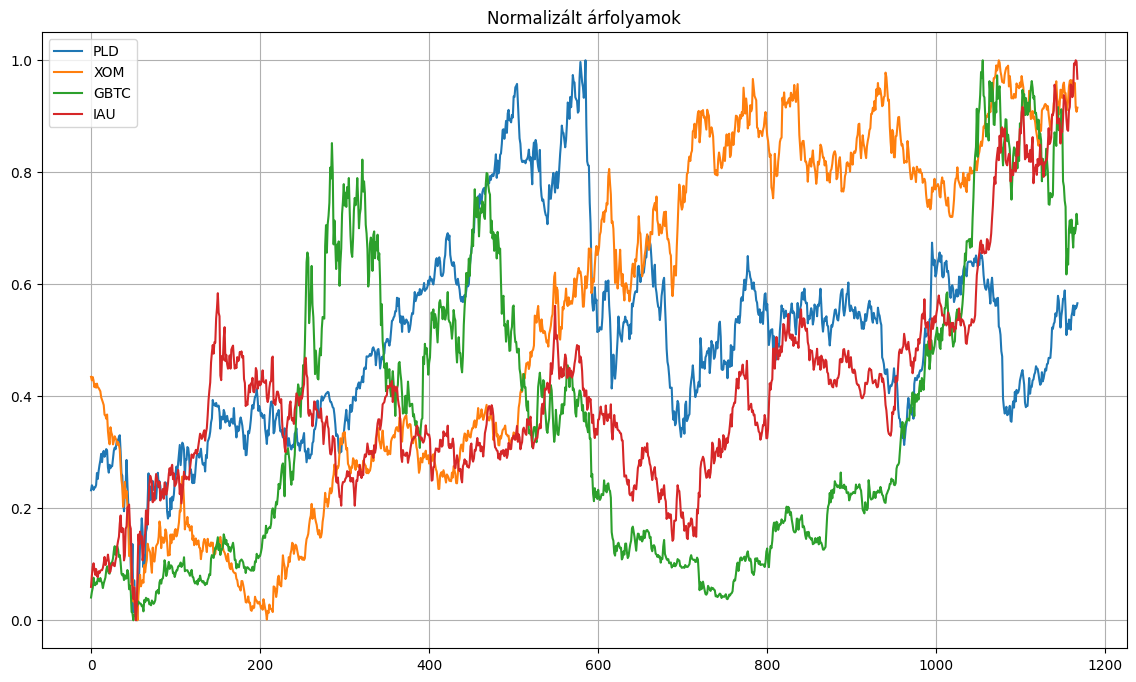

In [26]:
# Vizuális megjelenítés

plt.figure(figsize=(14, 8))
for ticker in portfolio_norm.columns:
    plt.plot(portfolio_norm.index, portfolio_norm[ticker], label=f'{ticker}')

plt.legend()
plt.grid(True)
plt.title("Normalizált árfolyamok")
plt.show()

Befektetett összeg számítása - Tört részvényszám megengedett



<Axes: xlabel='Date', ylabel='Value'>

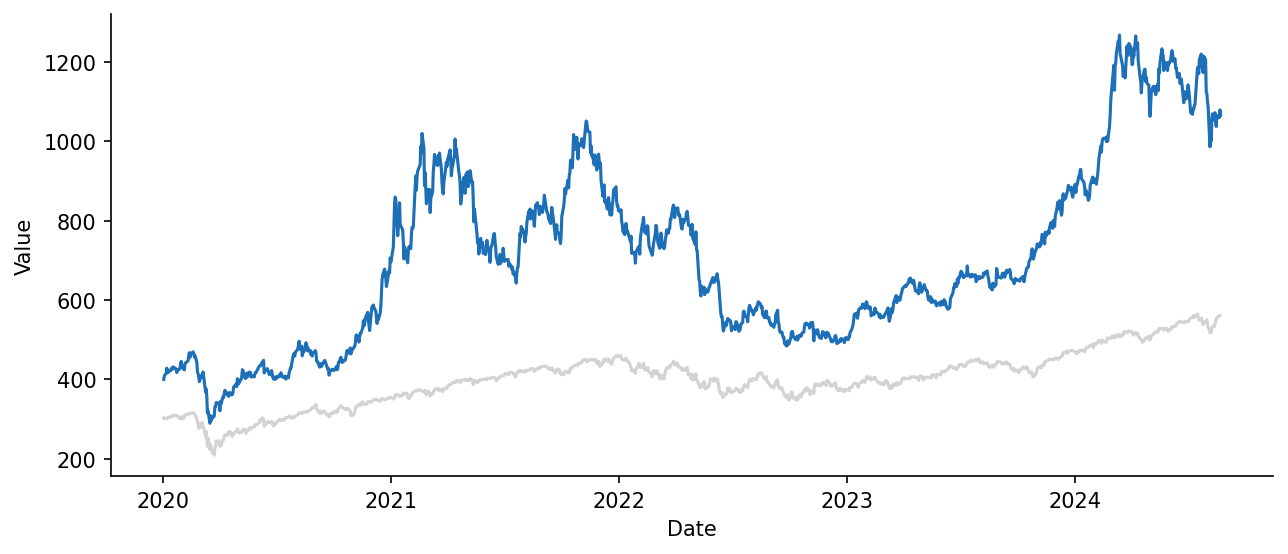

In [65]:
# Kezdeti befektetés összege befektetési eszközönként
initial_investment = 100

# Kezdeti árak
initial_prices = portfolio.iloc[0]

# Az egyes tickerekre vonatkozó befektetési értékek kiszámítása időben
investment_values = pd.DataFrame(index=portfolio.index)
tickers = selected_combinations[0]

for ticker in tickers:
    shares = initial_investment / initial_prices[ticker]

    investment_values[ticker] = portfolio[ticker] * shares

# A teljes portfólió értékének kiszámítása időben
portfolio_value = investment_values.sum(axis=1)

portfolio_df = portfolio_value.to_frame(name="Value")
sp500_df = sp500_hist.to_frame(name="Close")

fig = plt.figure(figsize=(10, 4), dpi=150)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
# ax0.set_facecolor(background_color)

for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

sns.lineplot(x=portfolio_df.index,y='Value',data=portfolio_df,color='#1d70b8', ax=ax0)
sns.lineplot(x=sp500_df.index,y='Close',data=sp500_df, color = 'lightgray', ax=ax0)


In [172]:
# Az eredmény és a referencia DF összeolvasztása a hozam vizaulizálása céljából

result_df = pd.merge(portfolio_df, sp500_df, left_index=True, right_index=True)
result_df['Portfolio_return'] = result_df['Value'].pct_change()
result_df['Reference_return'] = result_df['Close'].pct_change()

Portfólió kiértékelése

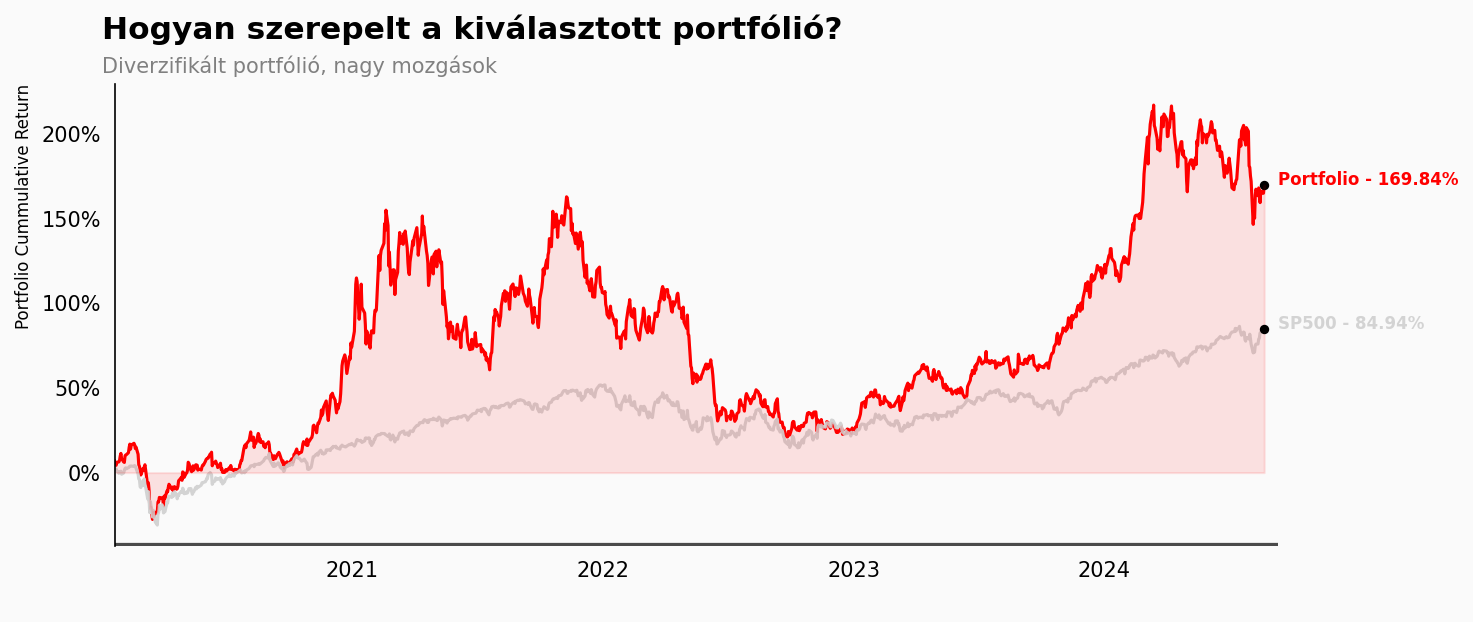

In [166]:
from matplotlib.ticker import FuncFormatter
from datetime import datetime, timedelta

background_color = "#fafafa"

fig = plt.figure(figsize=(10, 4), dpi=150, facecolor=background_color)

gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top", "bottom"]:
    ax0.spines[s].set_visible(False)

sns.lineplot(ax=ax0, x=result_df.index, y=result_df['Portfolio_Cumulative_Return'], data=result_df, color='red')
sns.lineplot(ax=ax0, x=result_df.index, y=result_df['Reference_Cumulative_Return'], data=result_df, color='lightgray')

Ystart, Yend = ax0.get_ylim()
Xend = result_df.index[-1].date() +  timedelta(days=20)
Xstart = result_df.index[0].date()

ax0.text(Xstart,Yend+(Yend*0.1), 'Hogyan szerepelt a kiválasztott portfólió?', color='black', fontsize=15, ha='left', va='bottom', weight='bold')
ax0.text(Xstart,Yend+(Yend*0.075), 'Diverzifikált portfólió, nagy mozgások', color='gray', fontsize=10, ha='left', va='top')

ax0.set_xlim(Xstart+timedelta(days=20), Xend)

ax0.text(x= Xend,y=result_df['Portfolio_Cumulative_Return'].iloc[-1],color ='red',fontweight='bold',fontsize=8, rotation=0, s=f"Portfolio - {result_df['Portfolio_Cumulative_Return'].iloc[-1]:.2%}")
ax0.plot(result_df.index[-1],result_df['Portfolio_Cumulative_Return'].iloc[-1], marker = 'o', markersize=3, fillstyle='full',color='black', markeredgewidth=1.5)
ax0.fill_between(result_df.index, result_df['Portfolio_Cumulative_Return'], color='red', zorder=2, alpha=0.1)

ax0.text(Xend,result_df['Reference_Cumulative_Return'].iloc[-1],color ='lightgrey',fontweight='bold',fontsize=8, rotation=0, s=f"SP500 - {result_df['Reference_Cumulative_Return'].iloc[-1]:.2%}")
ax0.plot(result_df.index[-1],result_df['Reference_Cumulative_Return'].iloc[-1], marker = 'o', markersize=3, fillstyle='full',color='black', markeredgewidth=1.5)

ax0.set_xlabel(" ",fontsize=8,loc='left')
ax0.set_ylabel("Portfolio Cummulative Return",loc='top',fontsize=8)

ax0.axvline(x = Xstart, color = 'black', linewidth = 3, alpha = .7)
ax0.axhline(y = Ystart, color = 'black', linewidth = 3, alpha = .7)

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))

ax0.tick_params(axis = "both", which = "both", left=False, bottom=False)
plt.xticks(fontsize=10)  # Itt állíthatod be a kívánt betűméretet


plt.show();

Referencia hozam kiszámítása - Állampapír

In [66]:
# Kezdeti befektetés
initial_investment_gov = 400  # Tegyük fel, hogy 10 000 HUF-t fektettünk be 2020-ban USD alapon

# Állampapír éves hozama (2020-ban elérhető)
annual_yield = 4.95 / 100

# Évek száma
years = 4  # 2020-tól 2024-ig

# A befektetés értékének kiszámítása az évek során
investment_value_gov = initial_investment_gov * (1 + annual_yield) ** years

print(f"A befektetés értéke a kezdetekkor: {initial_investment_gov:.0f}, 2024-ben: {investment_value_gov:.0f} USD, a hozama pedig {((investment_value_gov/initial_investment_gov)-1)*100:.2f}%")

A befektetés értéke a kezdetekkor: 400, 2024-ben: 485 USD, a hozama pedig 21.32%


Referencia hozom - SP500

In [84]:
# Kezdeti befektetés
initial_investment = sp500_hist.iloc[0]

# Befektetés értéke 2024-ben
initial_investment_actual = sp500_hist.iloc[-1]

# A befektetés értékének kiszámítása az évek során
print(f"A befektetés értéke a kezdetekkor: {initial_investment:.0f}, 2024-ben: {initial_investment_actual:.0f} USD, a hozama pedig {((initial_investment_actual/initial_investment)-1)*100:.2f}%")

A befektetés értéke a kezdetekkor: 303, 2024-ben: 561 USD, a hozama pedig 84.94%


Részvények esetén - Diverzifikált portfólió

In [168]:
# Kezdeti befektetés
initial_investment = portfolio_value.iloc[0]

# Befektetés értéke 2024-ben
initial_investment_actual = portfolio_value.iloc[-1]

print(f"A befektetés értéke a kezdetekkor: {initial_investment:.0f}, 2024-ben: {initial_investment_actual:.0f} USD, a hozama pedig {((initial_investment_actual/initial_investment)-1)*100:.2f}%")

A befektetés értéke a kezdetekkor: 400, 2024-ben: 1066 USD, a hozama pedig 166.39%


Infláció figyelembevétele - Állampapír

In [69]:
# Kezdeti befektetés
initial_investment = initial_investment_gov

# Befektetés értéke 2024-ben
actual_value = investment_value_gov

# Inflációs ráták Magyarországon
inflation_rates = {
    2020: 3.3,
    2021: 5.1,
    2022: 14.5,
    2023: 18.1,
    2024: 4  # Feltételezett érték
}

# Inflációs faktorok kiszámítása
cumulative_inflation_factor = 1.0
for year, inflation_rate in inflation_rates.items():
    cumulative_inflation_factor *= (1 + inflation_rate / 100)

# Inflációval korrigált érték kiszámítása
inflation_adjusted_final_value = actual_value / cumulative_inflation_factor

print(f"A befektetés inflációval korrigált értéke 2024-ben: {inflation_adjusted_final_value:.2f} USD, a hozama pedig {((inflation_adjusted_final_value/initial_investment)-1)*100:.2f}%")

A befektetés inflációval korrigált értéke 2024-ben: 317.83 USD, a hozama pedig -20.54%


Infláció figyelembevétele - SP500

In [85]:
# Kezdeti befektetés
initial_investment = initial_investment

# Befektetés értéke 2024-ben
actual_value = initial_investment_actual

# Inflációs ráták Magyarországon
inflation_rates = {
    2020: 3.3,
    2021: 5.1,
    2022: 14.5,
    2023: 18.1,
    2024: 4  # Feltételezett érték
}

# Inflációs faktorok kiszámítása
cumulative_inflation_factor = 1.0
for year, inflation_rate in inflation_rates.items():
    cumulative_inflation_factor *= (1 + inflation_rate / 100)

# Inflációval korrigált érték kiszámítása
inflation_adjusted_final_value = actual_value / cumulative_inflation_factor

print(f"A befektetés inflációval korrigált értéke 2024-ben: {inflation_adjusted_final_value:.2f} USD, a hozama pedig {((inflation_adjusted_final_value/initial_investment)-1)*100:.2f}%")

A befektetés inflációval korrigált értéke 2024-ben: 367.18 USD, a hozama pedig 21.13%


Infláció figyelembevétele - Részvények

In [70]:
# Kezdeti befektetés
initial_investment = initial_investment

# Befektetés értéke 2024-ben
actual_value = initial_investment_actual

# Inflációs ráták Magyarországon
inflation_rates = {
    2020: 3.3,
    2021: 5.1,
    2022: 14.5,
    2023: 18.1,
    2024: 4  # Feltételezett érték
}

# Inflációs faktorok kiszámítása
cumulative_inflation_factor = 1.0
for year, inflation_rate in inflation_rates.items():
    cumulative_inflation_factor *= (1 + inflation_rate / 100)

# Inflációval korrigált érték kiszámítása
inflation_adjusted_final_value = actual_value / cumulative_inflation_factor

print(f"A befektetés inflációval korrigált értéke 2024-ben: {inflation_adjusted_final_value:.2f} USD, a hozama pedig {((inflation_adjusted_final_value/initial_investment)-1)*100:.2f}%")

A befektetés inflációval korrigált értéke 2024-ben: 696.42 USD, a hozama pedig 74.11%


In [90]:
# Hozamok kiszámítása
portfolio_value_beta = portfolio_value.pct_change()
benchmark_data = sp500_hist.pct_change()

# Kockázatmentes hozam (éves szinten 4,95% -> napi szinten)
risk_free_rate = 0.0495
daily_risk_free_rate = (1 + risk_free_rate) ** (1/252) - 1  # 252 kereskedési nap egy évben

# Sharpe-mutató kiszámítása
excess_return = portfolio_value_beta - daily_risk_free_rate
sharpe_ratio = excess_return.mean() / excess_return.std() * np.sqrt(252)

# Béta kiszámítása
covariance = np.cov(portfolio_value_beta.dropna(), benchmark_data.dropna())[0, 1]
variance = benchmark_data.var()
beta = covariance / variance

print(f"Sharpe-mutató: {sharpe_ratio:.2f}")
print(f"Béta: {beta:.2f}")

Sharpe-mutató: 0.61
Béta: 0.89
